# Alucar: Analisando as vendas

In [18]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
print('Bibliotecas importadas com sucesso')

Bibliotecas importadas com sucesso


In [4]:
alucar = pd.read_csv('dados/alucar.csv',sep = ',')
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [5]:
alucar.shape
alucar.isna().sum()#verificando registros invalidos

mes       0
vendas    0
dtype: int64

In [6]:
alucar.isna().sum().sum()#sintetizando o anterior, basicamente somando tudo

0

In [7]:
alucar.dtypes#verifiando os tipos da variável

mes       object
vendas     int64
dtype: object

In [9]:
alucar['mes'] = pd.to_datetime(alucar['mes'])#transformando object em datetime, aparentemente esse é o modo correto de rtabalhar com series temporais

In [10]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [11]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


<AxesSubplot:xlabel='mes', ylabel='vendas'>

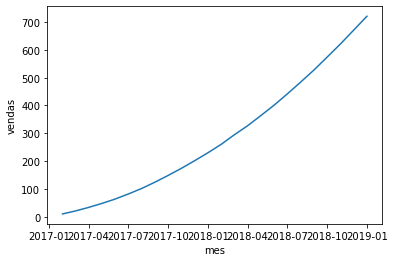

In [21]:
sns.lineplot(x = 'mes',y = 'vendas',data=alucar)#montando um gráfico

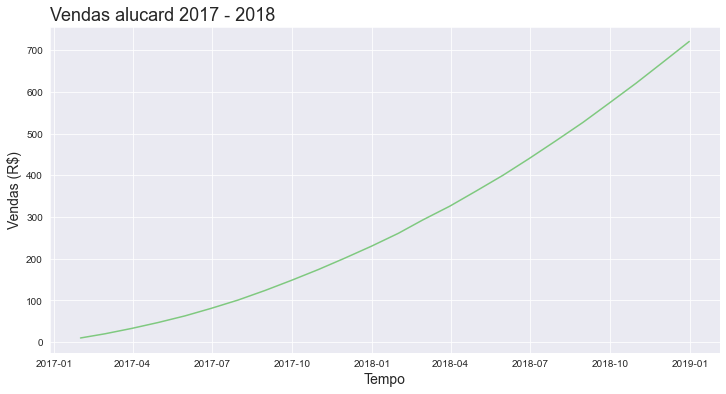

In [32]:
    sns.set_palette('Accent')#deixando o gráfico com paleta de cores
    sns.set_style('darkgrid')#adicionando grade
    ax = sns.lineplot(x = 'mes',y = 'vendas',data=alucar)#removendo descrição do python
    ax.figure.set_size_inches(12,6)#aumentando o tamanho, interessante que quando falamos da figura, precisamos do .figure
    ax.set_title('Vendas alucard 2017 - 2018', loc = 'left',fontsize=18)#adicionando titulo
    ax.set_xlabel('Tempo',fontsize=14)#adicionando titulo eixo x
    ax.set_ylabel('Vendas (R$)',fontsize=14)#adicionando titulo eixo y
    ax = ax#dessa maneira removemos uma linha que fica em cima com dados da memória
    #ficou bem bonito

In [34]:
alucar['var'] = alucar['vendas'].diff()#começa a faer variação com valor anterior
alucar

,mes,vendas,var
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


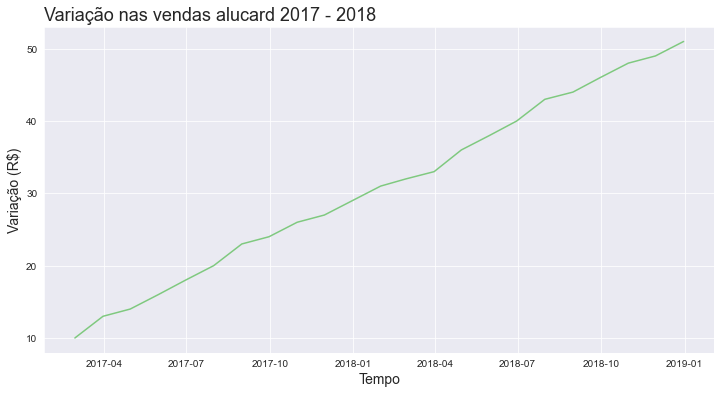

In [35]:
    sns.set_palette('Accent')#deixando o gráfico com paleta de cores
    sns.set_style('darkgrid')#adicionando grade
    ax = sns.lineplot(x = 'mes',y = 'var',data=alucar)#removendo descrição do python
    ax.figure.set_size_inches(12,6)#aumentando o tamanho, interessante que quando falamos da figura, precisamos do .figure
    ax.set_title('Variação nas vendas alucard 2017 - 2018', loc = 'left',fontsize=18)#adicionando titulo
    ax.set_xlabel('Tempo',fontsize=14)#adicionando titulo eixo x
    ax.set_ylabel('Variação (R$)',fontsize=14)#adicionando titulo eixo y
    ax = ax#dessa maneira removemos uma linha que fica em cima com dados da memória
    #ficou bem bonito

In [36]:
    def plotar(titulo,labelx,labely,x,y,dataset):#definindo uma função para facilitar o trabalho
        sns.set_palette('Accent')#deixando o gráfico com paleta de cores
        sns.set_style('darkgrid')#adicionando grade
        ax = sns.lineplot(x=x,y=y,data=dataset)
        ax.figure.set_size_inches(12,6)#aumentando o tamanho, interessante que quando falamos da figura, precisamos do .figure
        ax.set_title(titulo, loc = 'left',fontsize=18)#adicionando titulo
        ax.set_xlabel(labelx,fontsize=14)#adicionando titulo eixo x
        ax.set_ylabel(labely,fontsize=14)#adicionando titulo eixo y
        ax = ax#dessa maneira removemos uma linha que fica em cima com dados da memória
    #ficou bem bonito

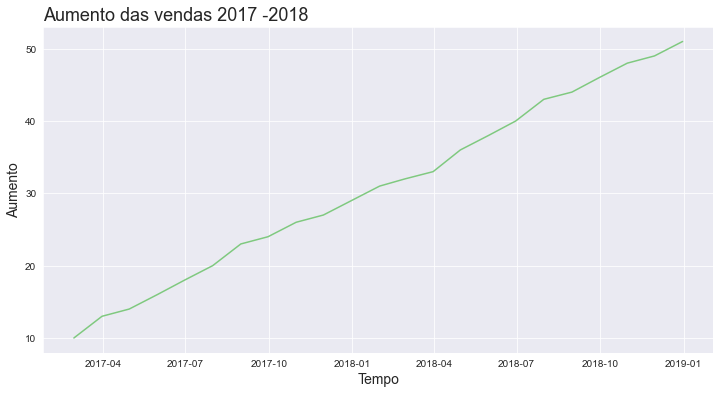

In [37]:
plotar('Aumento das vendas 2017 -2018','Tempo','Aumento','mes','var',alucar)

In [39]:
alucar['acel'] = alucar['var'].diff()#verificando a aceleração
alucar

,mes,vendas,var,acel
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


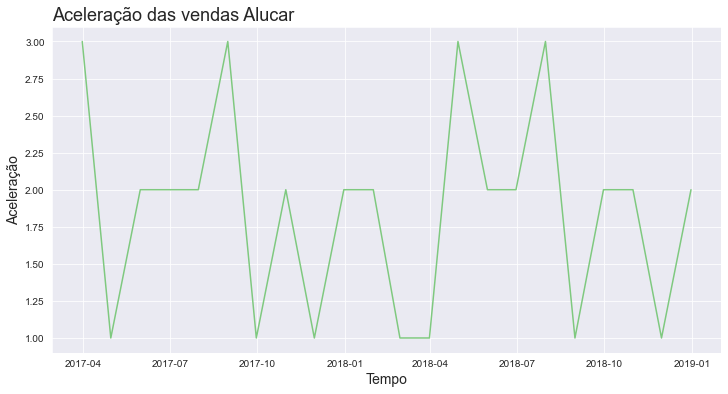

In [40]:
plotar('Aceleração das vendas Alucar',"Tempo",'Aceleração','mes','acel',alucar)

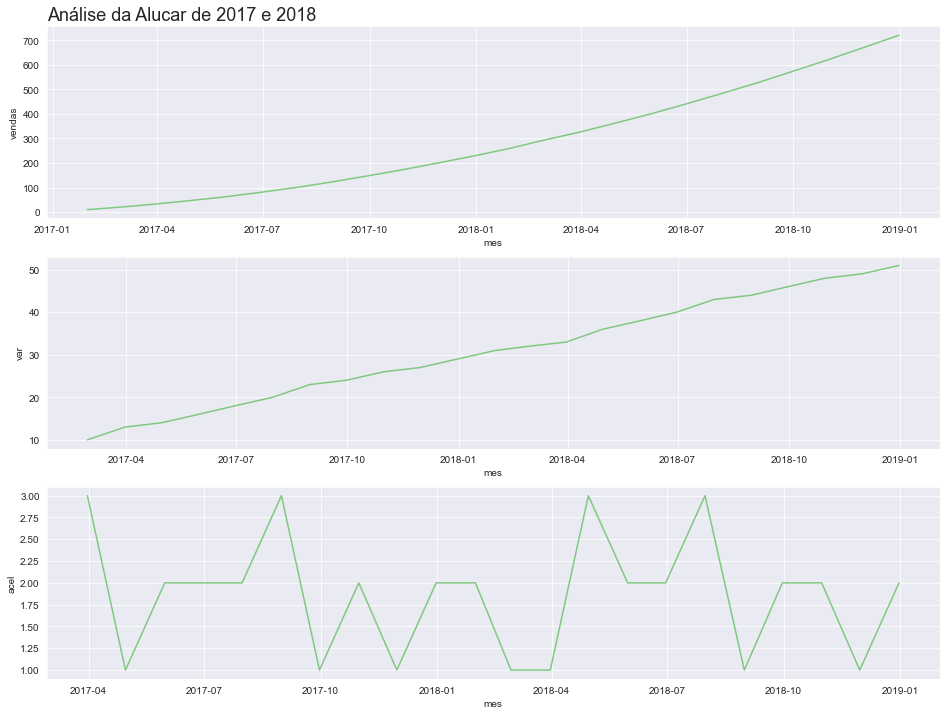

In [43]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)#montando um grafico composto
ax.set_title('Análise da Alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)#chamando o segundo gráfico
sns.lineplot(x='mes',y='var',data=alucar)
plt.subplot(3,1,3)#chamando o terceiro gráfico
sns.lineplot(x='mes',y='acel',data=alucar)
ax = ax

In [44]:
def plot_comp(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax = ax

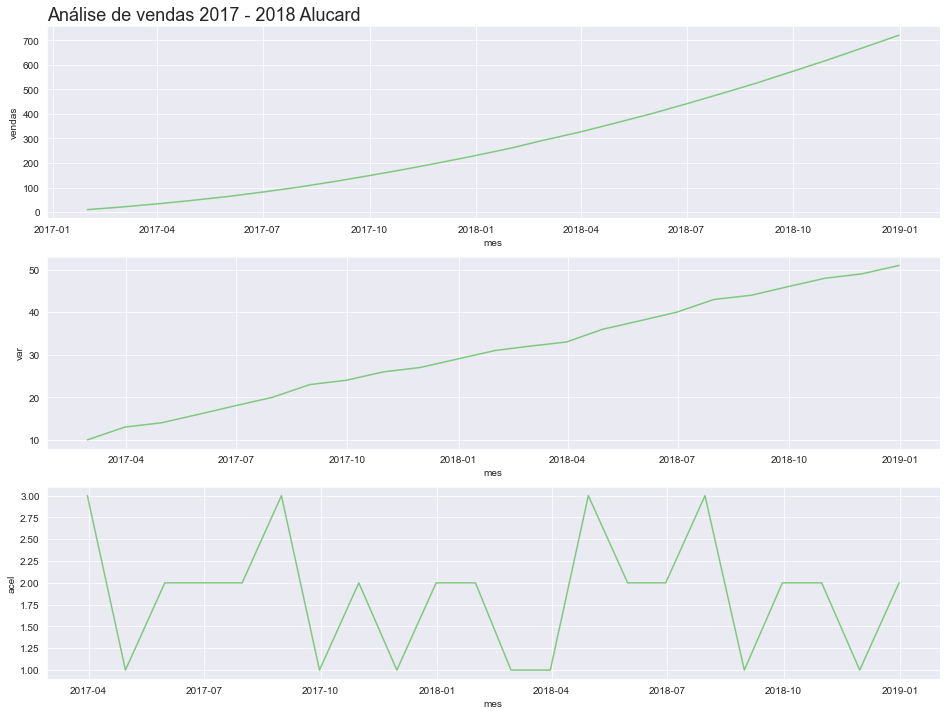

In [45]:
plot_comp('mes','vendas','var','acel',alucar,'Análise de vendas 2017 - 2018 Alucard')

In [47]:
from pandas.plotting import autocorrelation_plot as aplot#biblioteca utilizada para fazer estudos de correlação

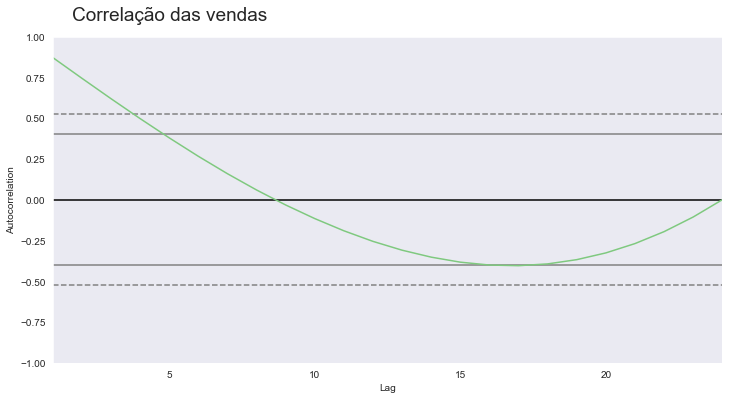

In [53]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas',fontsize=19,x=0.26,y=0.95)#x e y dizem onde deve estar o subtitulo, temos que ir colocando a orientação dsejada, não goste muito
aplot(alucar['vendas'])
ax = ax

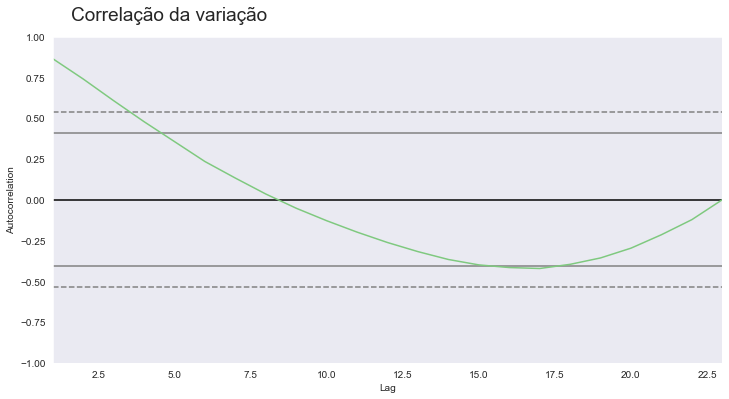

In [55]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da variação',fontsize=19,x=0.26,y=0.95)
aplot(alucar['var'][1:])#temos que orientar a utilizar somente a partir do 1º dia, já que anteriormente temos nan, e isso trava o gráfico
ax = ax

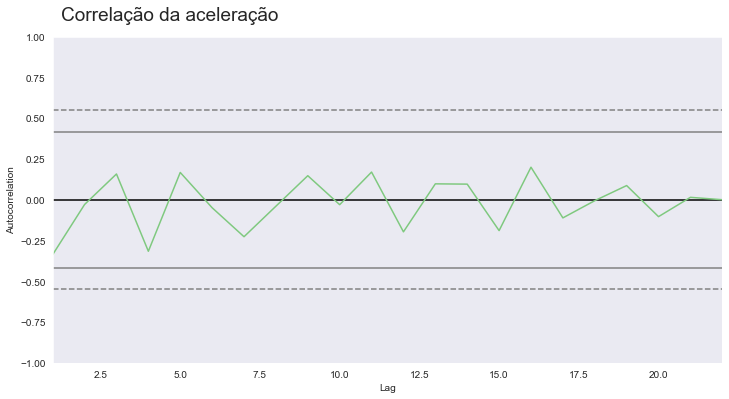

In [57]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleração',fontsize=19,x=0.26,y=0.95)
aplot(alucar['acel'][2:])#idem dia 2
ax = ax